In [3]:
import re
import matplotlib.pyplot as plt
from pymatgen.matproj.rest import MPRester
import os
from pymatgen.core.periodic_table import Element

from pandas import DataFrame
import pandas as pd
def print_full(x):
    pd.set_option('display.max_rows', len(x))
    print(x)

In [11]:
df = pd.read_csv('/Users/yao/Google Drive/data/2116/query_mp/queries_2116_icsd.csv')
df.sort(columns=['Spacegroup'])

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


,Unnamed: 0,Materials ID,Icsd ID,Formula,Spacegroup,Nsites,Ehull,Bandgap,"A,B,Bp,X",Tolerance_factor,Oct_factor
0,0,mp-573204,9383,Cs2KBiF6,Fm-3m,10,0.000000,4.9469,"('Cs', 'K', 'Bi', 'F')",0.895390,0.906015
19,19,mp-7886,25366,Cs2RbYF6,Fm-3m,10,0.000000,6.2119,"('Cs', 'Rb', 'Y', 'F')",0.893627,0.909774
39,39,mp-14037,27340,Tl2NaRhF6,Fm-3m,10,0.000000,1.7803,"('Tl', 'Na', 'Rh', 'F')",0.986206,0.633459
21,21,mp-628819,6036,Cs2TlFeF6,Fm-3m,10,0.000000,2.8622,"('Cs', 'Tl', 'Fe', 'F')",0.944771,0.806391
25,25,mp-9839,408553,K2LiAlF6,Fm-3m,10,0.001505,7.4418,"('K', 'Li', 'Al', 'F')",1.062001,0.486842
26,26,mp-6586,6027,K2NaAlF6,Fm-3m,10,0.000000,6.8580,"('K', 'Na', 'Al', 'F')",0.996492,0.584586
27,27,mp-558674,61277,K2NaFeF6,Fm-3m,10,0.000000,4.0922,"('K', 'Na', 'Fe', 'F')",0.971148,0.625940
18,18,mp-559695,9384,Cs2RbBiF6,Fm-3m,10,0.000000,4.7749,"('Cs', 'Rb', 'Bi', 'F')",0.871329,0.958647
28,28,mp-14039,27342,K2NaRhF6,Fm-3m,10,0.000000,1.9994,"('K', 'Na', 'Rh', 'F')",0.966678,0.633459
30,30,mp-13798,22114,K2NaTlF6,Fm-3m,10,0.000000,3.6205,"('K', 'Na', 'Tl', 'F')",0.920091,0.716165


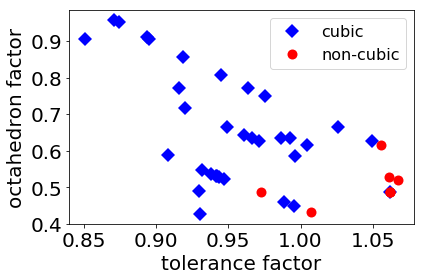

In [17]:
plt.plot(df[df['Spacegroup']=='Fm-3m']['Tolerance_factor'], df[df['Spacegroup']=='Fm-3m']['Oct_factor'],\
        'D',color = 'b', ms = 10, mew = 0, label = 'cubic')
plt.plot(df[df['Spacegroup']!='Fm-3m']['Tolerance_factor'], df[df['Spacegroup']!='Fm-3m']['Oct_factor'],\
        'o',color = 'r', ms = 10, mew = 0, label = 'non-cubic')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.xlabel('tolerance factor', fontsize = 20)
plt.ylabel('octahedron factor', fontsize = 20)
plt.legend(fontsize=16)
#plt.xlim(0.5,1.2)

#plt.axhline(y=0.29, xmin=0.4, xmax=1, ls = '--', linewidth=2, color = 'k', hold=None)
#plt.axvline(x=0.88, ymin=0.15, ymax=1, ls = '--', linewidth=2, color = 'k', hold=None)
#plt.legend(loc='upper right', fontsize = 15)
plt.tight_layout()
plt.savefig('/Users/yao/Google Drive/data/2116/structure_map_2116_icsd.pdf', dpi=300)
plt.show()